In [70]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import datetime
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

stocks_data = pd.read_csv('./top200_training.csv' )
stocks_data = stocks_data.drop(columns=['證券代碼'])
stocks_data

data_years = stocks_data['年月'].unique()
data_years

array([199712, 199812, 199912, 200012, 200112, 200212, 200312, 200412,
       200512, 200612, 200712, 200812, 200912], dtype=int64)

In [75]:
train_years = 5
train_data = stocks_data[stocks_data['年月'].isin(data_years[:train_years])]
# train_data_label = train_data['ReturnMean_year_Label']
train_data_label = train_data['Return']
train_data = train_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])

test_data = stocks_data[stocks_data['年月'].isin(data_years[train_years:])]
test_data_label = test_data['Return']
test_data = test_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])

train_data

,市值(百萬元),收盤價(元)_年,本益比,股價淨值比,股價營收比,M淨值報酬率─稅後,資產報酬率ROA,營業利益率OPM,利潤邊際NPM,負債/淨值比,M流動比率,M速動比率,M存貨週轉率 (次),M應收帳款週轉次,M營業利益成長率,M稅後淨利成長率
0,457105,15.24,3.4636,0.89594,1.41640,0.144140,0.223790,0.339850,0.408870,0.55256,223.86,177.18,5.99,6.34,-18.13,-8.00
1,263536,20.55,9.1333,1.27240,3.38550,0.111460,0.145880,0.142950,0.388200,0.30889,338.15,303.48,5.27,6.80,-41.39,27.37
2,181781,5.53,2.6209,0.35770,0.42117,0.077890,0.136380,0.227920,0.160150,0.75094,85.46,26.60,4.10,22.41,44.39,63.01
3,175637,14.81,6.6116,0.74949,0.40821,0.035977,0.099458,0.091372,0.061046,1.76440,133.30,80.55,4.36,7.00,8.65,-15.94
4,166991,158.47,7.0746,2.59620,2.39490,0.300880,0.356970,0.269490,0.329330,0.18643,556.46,476.72,7.60,23.93,52.07,84.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4994,24.31,-27.0111,1.42750,2.21810,-0.029119,-0.048309,0.037043,-0.075063,0.65902,312.09,223.87,4.82,4.25,-86.98,-131.45
996,4972,5.27,14.6389,0.49953,0.42846,0.011767,0.033562,-0.043432,0.029905,1.85230,102.64,15.56,1.04,12.99,-102.47,126.36
997,4891,2.70,3.3750,0.18987,0.30612,0.027770,0.058281,0.201940,0.093952,1.09870,134.79,101.85,0.00,21.39,-25.93,-38.30
998,4874,21.10,14.5517,1.11520,0.79743,0.050320,0.076555,0.061241,0.054740,0.52135,215.36,96.29,3.26,3.88,-0.41,-25.90


In [84]:
#regressor = tree.DecisionTreeRegressor(max_depth=15, random_state=1)     
regressor = RandomForestRegressor(n_estimators = 100, max_depth=20, random_state=0 , n_jobs = -1)
regressor.fit(train_data, train_data_label)  #訓練 fit(Data, Label)
cross_val_score(regressor, train_data, train_data_label , cv=10).mean()
#regressor.score(train_data, train_data_label)

-0.49007374719662666

4822.525487744598


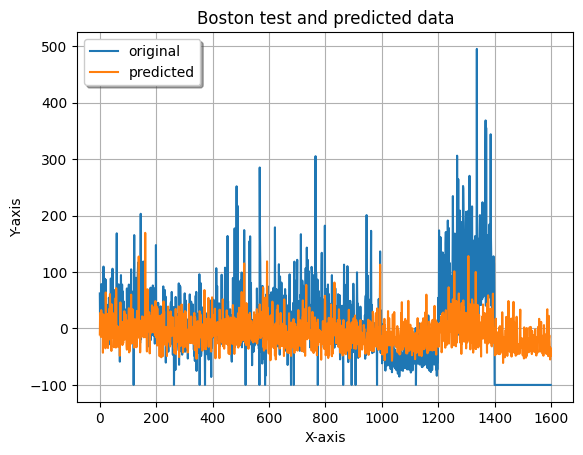

In [85]:

test_data_pred = regressor.predict(test_data)
mse = mean_squared_error(test_data_label , test_data_pred)
print(mse)
test_data_label = test_data_label.reset_index(drop=True)
test_data_label.to_numpy()
#print(test_data_label.to_numpy())
#print(type(test_data_pred))

plt.plot(range(len(test_data)), test_data_label, label="original")
plt.plot(range(len(test_data)), test_data_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   